## This notebook tests the implementation of Gaussian Process with and without Derivative Observations

First we test Gaussian Processes in **2D**


In [1]:
import numpy as np
from utils.gaussian_process import GaussianProcess as GP
from utils.kernel import RBFKernel
import matplotlib.pyplot as plt
import random
random.seed(2020)
%matplotlib inline
%matplotlib notebook

In [11]:
kernel_test = RBFKernel(alpha=1, gamma=2)
def y(x):
    return np.sin(3*x)
def dy(x):
    return np.cos(x)

In [12]:
X = np.linspace(-2, 2, 5)
X_x = np.linspace(-2.5,2.5,100).reshape(-1, 1)
y_t = y(X)
dy_t = np.array([-0, 4, 3, 0, 2])
Y = y_t
Y_do = np.hstack((y_t, dy_t)) 
Y = Y.reshape(-1, 1)
X = X.reshape(-1, 1)

In [17]:
gp = GP(kernel=kernel_test, derivative_observations=False, alpha=0.0, restarts=0)
gp_do = GP(kernel=kernel_test, derivative_observations=True, alpha=0.0, restarts=0)
gp.fit(X, Y, sample_ratio=1.0)
gp_do.fit(X, Y_do, sample_ratio=1.0)

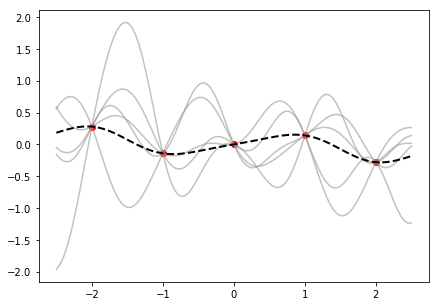

In [20]:
%matplotlib inline
# samples = gp.sample(X_x, n_samples=5)
plt.figure(figsize=(7,5))
deltax = 0.1

plt.plot(X, Y[:5], 'ro')
plt.plot(X_x, samples[0], color=[0.6, 0.6, 0.6, 0.6])
plt.plot(X_x, gp.predict(X_x), 'k--', linewidth=2)
# plt.title("Gaussian Process without Derivative Observations noise-free setting")

<class 'list'>


Text(0.5, 1.0, 'Gaussian Process with Derivative Observations noise-free setting')

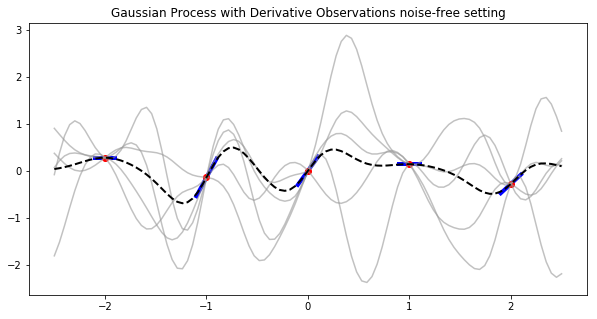

In [6]:
%matplotlib inline
samples = gp_do.sample(X_x, n_samples=5)
print(type(samples))
plt.figure(figsize=(10,5))
deltax = 0.1
for i in range(5):
    g = Y_do[5+i]
    f = Y_do[i]
    x1 = X[i]-deltax
    x2 = X[i]+deltax
    y1 = f - g*deltax
    y2 = f + g*deltax
    plt.plot([x1,x2],[y1,y2],'b',linewidth=4)

plt.plot(X, Y_do[:5], 'ro')
plt.plot(X_x, samples[0], color=[0.6, 0.6, 0.6, 0.6])
plt.plot(X_x, gp_do.predict(X_x), 'k--', linewidth=2)
plt.title("Gaussian Process with Derivative Observations noise-free setting")

### Now testing for points in 3D

In [9]:
kernel_test = RBFKernel()
Xx, Yy = np.mgrid[-2.5:2.5:0.25, -2.5:2.5:0.25]
positions = np.vstack([Xx.ravel(), Yy.ravel()]).T

def plane_equation(y, x, i, positions):
    return y[i] + y[i+5]*(positions[:,0] - x[i][0]) + y[i+10]*(positions[:,1] - x[i][1])

X = positions[[78, 127, 247, 323, 378]]
K = kernel_test(X)
X_x = np.linspace(-2.5,2.5,900).reshape(-1, 2)
y_t = np.random.multivariate_normal(np.zeros((5)),K)
dy_t1 = np.zeros_like(X).reshape(-1)
Y = np.hstack((y_t, dy_t1))
Y[-9] = 2
Y[-3] = 5
Y[-1] = -1
Y[-6] = 1
Y[-5] = -3
Y[-8] = 2
Y = Y.reshape(-1, 1)
X = X.reshape(-1, 2)

In [10]:
gp = GP(kernel=kernel_test, derivative_observations=True)
gp.fit(X, Y, sample_ratio=1)

<IPython.core.display.Javascript object>


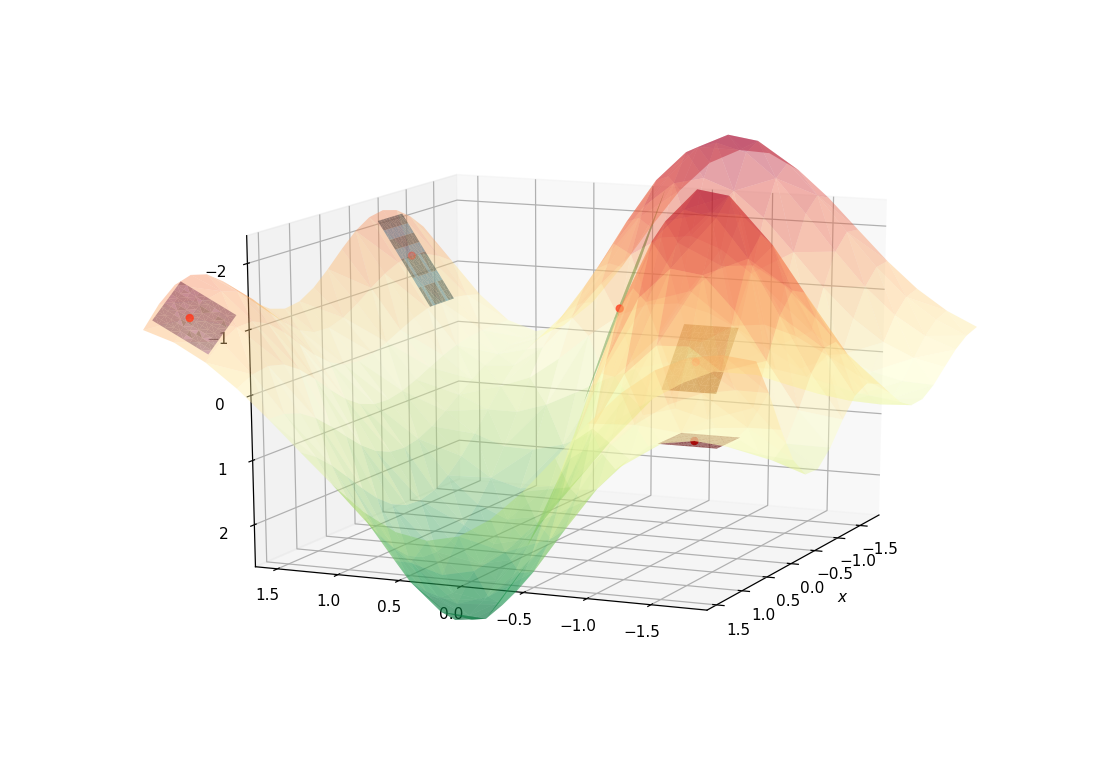

Text(0.5, 0, '$x$')

In [11]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y[:5], c='r')

Z = gp.predict(positions)
for i in range(5):
    Xxx, Yyy = np.mgrid[X[i][0]-0.25:X[i][0]+0.25:0.05, X[i][1]-0.25:X[i][1]+0.25:0.05]
    ps = np.vstack([Xxx.ravel(), Yyy.ravel()]).T
    p = plane_equation(Y, X, i, ps)
    ax.plot_trisurf(ps[:, 0], ps[:, 1], p, alpha=0.7)

ax.plot_trisurf(positions[:, 0], positions[:, 1], Z.reshape(-1), cmap='RdYlGn', alpha=0.4)
ax.view_init(0, 20)
ax.set_xlabel('$x$')